In [1]:
import pysplit
import pandas as pd
import numpy as np
from wrf import getvar, get_basemap, latlon_coords
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import seaborn as sns
import argparse
import matplotlib as mpl
import xarray as xr
from itertools import product
import matplotlib.patheffects as path_effects

In [2]:
def get_winddir(comp_brngs):
    md = 270 - comp_brngs
    if md < 0:
        new_md = md + 360
    else:
        new_md = md
    return new_md 

def nan_if(arr, value):
    return np.where(arr == value, np.nan, arr)

wrffile = Dataset('/glade/scratch/molina/basile/wrfout_d01_2002-12-30_18:00:00.nc4')
tfile = getvar(wrffile, 'tk')
m = get_basemap(tfile)
lats, lons = latlon_coords(tfile)

In [3]:
cmap = sns.cubehelix_palette(16, start=.5, rot=-.75, as_cmap=True)
norm = mpl.colors.Normalize(vmin=0,vmax=20)

In [6]:
which_climate='hist'
ds1=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jun_subregion1_{which_climate}.nc")
x, y = np.meshgrid(ds1.lons.values, ds1.lats.values)

In [40]:
maskfile = xr.open_dataset('/glade/scratch/molina/basile/maskfile.nc')

In [41]:
land=np.ma.masked_where(maskfile.land.values==1, maskfile.land.values)
goa=np.ma.masked_where(maskfile.goa.values==1, maskfile.goa.values)
bs=np.ma.masked_where(maskfile.bs.values==1, maskfile.bs.values)
ao=np.ma.masked_where(maskfile.ao.values==1, maskfile.ao.values)
none=np.ma.masked_where(maskfile.none.values==1, maskfile.none.values)

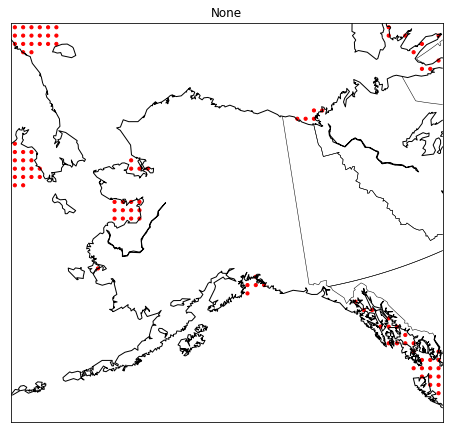

In [7]:
fig = plt.figure(figsize=(6.,6.))
ax1 = fig.add_axes([0.0, 0., 1., 1.]) 
ax1.set_title('None', fontsize=12)
pc = m.scatter(x, y, none.mask*10, color='r')
#m.scatter(x[ 6, 50], y[ 6, 50], s=100, marker='X', color='b', zorder=10)
m.drawstates()
m.drawcoastlines()
m.drawcountries()
plt.show()

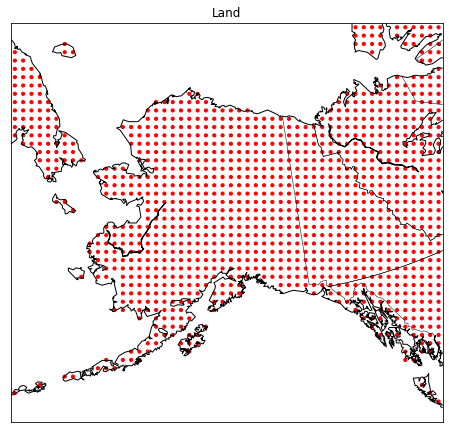

In [8]:
fig = plt.figure(figsize=(6.,6.))
ax1 = fig.add_axes([0.0, 0., 1., 1.]) 
ax1.set_title('Land', fontsize=12)
pc = m.scatter(x, y, land.mask*10, color='r')
m.drawstates()
m.drawcoastlines()
m.drawcountries()
plt.show()

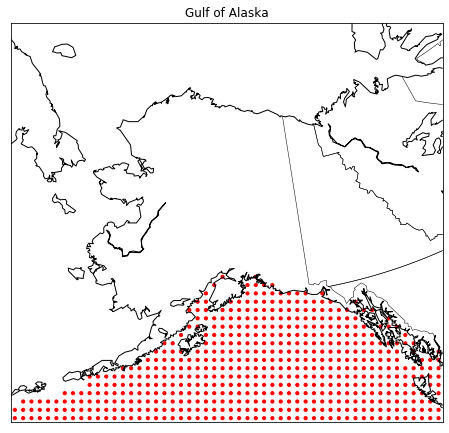

In [9]:
fig = plt.figure(figsize=(6.,6.))
ax1 = fig.add_axes([0.0, 0., 1., 1.]) 
ax1.set_title('Gulf of Alaska', fontsize=12)
pc = m.scatter(x, y, goa.mask*10, color='r')
m.drawstates()
m.drawcoastlines()
m.drawcountries()
plt.show()

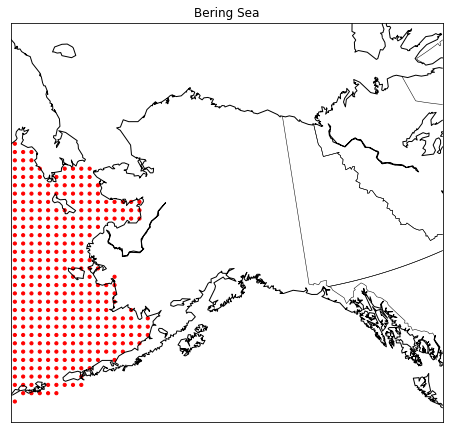

In [10]:
fig = plt.figure(figsize=(6.,6.))
ax1 = fig.add_axes([0.0, 0., 1., 1.]) 
ax1.set_title('Bering Sea', fontsize=12)
pc = m.scatter(x, y, bs.mask*10, color='r')
m.drawstates()
m.drawcoastlines()
m.drawcountries()
plt.show()

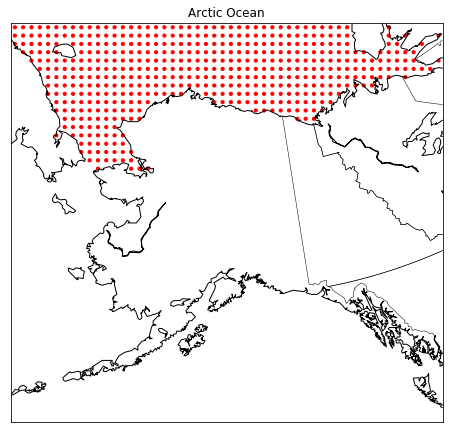

In [11]:
fig = plt.figure(figsize=(6.,6.))
ax1 = fig.add_axes([0.0, 0., 1., 1.]) 
ax1.set_title('Arctic Ocean', fontsize=12)
pc = m.scatter(x, y, ao.mask*10, color='r')
m.drawstates()
m.drawcoastlines()
m.drawcountries()
plt.show()

In [5]:
def regions_to_str(number):
    
    m = {
         1: 'West Coast',
         3: 'Central Interior',
         4: 'North Slope',
         5: 'Northeast Interior',
         6: 'Southeast Interior'
        }

    try:
        out = m[number]
        return out
    
    except:
        raise ValueError('Not a region')

In [7]:
which_climate='hist'

ds1=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jun_subregion1_{which_climate}.nc").frequency
ds2=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jun_subregion3_{which_climate}.nc").frequency
ds3=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jun_subregion4_{which_climate}.nc").frequency
ds4=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jun_subregion5_{which_climate}.nc").frequency
ds5=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jun_subregion6_{which_climate}.nc").frequency

ds6=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jul_subregion1_{which_climate}.nc").frequency
ds7=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jul_subregion3_{which_climate}.nc").frequency
ds8=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jul_subregion4_{which_climate}.nc").frequency
ds9=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jul_subregion5_{which_climate}.nc").frequency
ds10=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jul_subregion6_{which_climate}.nc").frequency

ds11=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_aug_subregion1_{which_climate}.nc").frequency
ds12=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_aug_subregion3_{which_climate}.nc").frequency
ds13=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_aug_subregion4_{which_climate}.nc").frequency
ds14=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_aug_subregion5_{which_climate}.nc").frequency
ds15=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_aug_subregion6_{which_climate}.nc").frequency

reg1=ds1+ds6+ds11
reg3=ds2+ds7+ds12
reg4=ds3+ds8+ds13
reg5=ds4+ds9+ds14
reg6=ds5+ds10+ds15

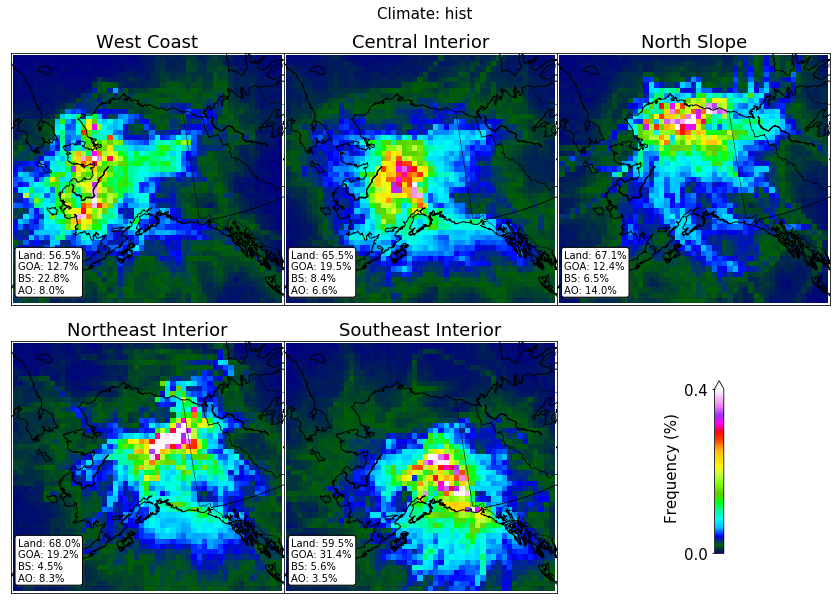

In [15]:
vmax_val=0.4

fig = plt.figure(figsize=(11.5,8.))
fig.suptitle(f'Climate: {which_climate}', fontsize=15, y=1.05)

ax1 = fig.add_axes([0.0, 0.5, 0.33, 0.5]) 
ax1.set_title(regions_to_str(1), fontsize=18)
pc = m.pcolormesh(reg1.lons.values, reg1.lats.values,
                  np.ma.masked_where(reg1==0, 100*(reg1/reg1.sum())),
                  cmap="gist_ncar", vmin=0, vmax=vmax_val)
ax1.text(0.025, 0.05, 
         u'Land: '+str(round(np.nansum(np.ma.masked_where(land.mask==False, reg1))/reg1.values.sum()*100, 1))+\
         '%\nGOA: '+str(round(np.nansum(np.ma.masked_where(goa.mask==False, reg1))/reg1.values.sum()*100, 1))+\
         '%\nBS: '+str(round(np.nansum(np.ma.masked_where(bs.mask==False, reg1))/reg1.values.sum()*100, 1))+\
         '%\nAO: '+str(round(np.nansum(np.ma.masked_where(ao.mask==False, reg1))/reg1.values.sum()*100, 1))+'%', 
         fontsize=10, alpha=1., color='k', zorder=6, transform=ax1.transAxes,
         bbox=dict(facecolor='w', edgecolor='k', alpha=1., linewidth=1., boxstyle='round', 
                   pad=0.25, path_effects=[path_effects.SimplePatchShadow(),path_effects.Normal()]))
m.drawstates()
m.drawcoastlines()
m.drawcountries()

ax2 = fig.add_axes([0.33, 0.5, 0.33, 0.5]) 
ax2.set_title(regions_to_str(3), fontsize=18)
pc = m.pcolormesh(reg3.lons.values, reg3.lats.values,
                  np.ma.masked_where(reg3==0, 100*(reg3/reg3.sum())),
                  cmap="gist_ncar", vmin=0, vmax=vmax_val)
ax2.text(0.025, 0.05, 
         u'Land: '+str(round(np.nansum(np.ma.masked_where(land.mask==False, reg3))/reg3.values.sum()*100, 1))+\
         '%\nGOA: '+str(round(np.nansum(np.ma.masked_where(goa.mask==False, reg3))/reg3.values.sum()*100, 1))+\
         '%\nBS: '+str(round(np.nansum(np.ma.masked_where(bs.mask==False, reg3))/reg3.values.sum()*100, 1))+\
         '%\nAO: '+str(round(np.nansum(np.ma.masked_where(ao.mask==False, reg3))/reg3.values.sum()*100, 1))+'%', 
         fontsize=10, alpha=1., color='k', zorder=6, transform=ax2.transAxes,
         bbox=dict(facecolor='w', edgecolor='k', alpha=1., linewidth=1., boxstyle='round', 
                   pad=0.25, path_effects=[path_effects.SimplePatchShadow(),path_effects.Normal()]))
m.drawstates()
m.drawcoastlines()
m.drawcountries()

ax3 = fig.add_axes([0.66, 0.5, 0.33, 0.5]) 
ax3.set_title(regions_to_str(4), fontsize=18)
pc = m.pcolormesh(reg4.lons.values, reg4.lats.values,
                  np.ma.masked_where(reg4==0, 100*(reg4/reg4.sum())),
                  cmap="gist_ncar", vmin=0, vmax=vmax_val)
ax3.text(0.025, 0.05, 
         u'Land: '+str(round(np.nansum(np.ma.masked_where(land.mask==False, reg4))/reg4.values.sum()*100, 1))+\
         '%\nGOA: '+str(round(np.nansum(np.ma.masked_where(goa.mask==False, reg4))/reg4.values.sum()*100, 1))+\
         '%\nBS: '+str(round(np.nansum(np.ma.masked_where(bs.mask==False, reg4))/reg4.values.sum()*100, 1))+\
         '%\nAO: '+str(round(np.nansum(np.ma.masked_where(ao.mask==False, reg4))/reg4.values.sum()*100, 1))+'%', 
         fontsize=10, alpha=1., color='k', zorder=6, transform=ax3.transAxes,
         bbox=dict(facecolor='w', edgecolor='k', alpha=1., linewidth=1., boxstyle='round', 
                   pad=0.25, path_effects=[path_effects.SimplePatchShadow(),path_effects.Normal()]))
m.drawstates()
m.drawcoastlines()
m.drawcountries()

ax4 = fig.add_axes([0.0, 0.0, 0.33, 0.5]) 
ax4.set_title(regions_to_str(5), fontsize=18)
pc = m.pcolormesh(reg5.lons.values, reg5.lats.values,
                  np.ma.masked_where(reg5==0, 100*(reg5/reg5.sum())),
                  cmap="gist_ncar", vmin=0, vmax=vmax_val)
ax4.text(0.025, 0.05, 
         u'Land: '+str(round(np.nansum(np.ma.masked_where(land.mask==False, reg5))/reg5.values.sum()*100, 1))+\
         '%\nGOA: '+str(round(np.nansum(np.ma.masked_where(goa.mask==False, reg5))/reg5.values.sum()*100, 1))+\
         '%\nBS: '+str(round(np.nansum(np.ma.masked_where(bs.mask==False, reg5))/reg5.values.sum()*100, 1))+\
         '%\nAO: '+str(round(np.nansum(np.ma.masked_where(ao.mask==False, reg5))/reg5.values.sum()*100, 1))+'%', 
         fontsize=10, alpha=1., color='k', zorder=6, transform=ax4.transAxes,
         bbox=dict(facecolor='w', edgecolor='k', alpha=1., linewidth=1., boxstyle='round', 
                   pad=0.25, path_effects=[path_effects.SimplePatchShadow(),path_effects.Normal()]))
m.drawstates()
m.drawcoastlines()
m.drawcountries()

ax5 = fig.add_axes([0.33, 0.0, 0.33, 0.5]) 
ax5.set_title(regions_to_str(6), fontsize=18)
pc = m.pcolormesh(reg6.lons.values, reg6.lats.values,
                  np.ma.masked_where(reg6==0, 100*(reg6/reg6.sum())),
                  cmap="gist_ncar", vmin=0, vmax=vmax_val)
ax5.text(0.025, 0.05, 
         u'Land: '+str(round(np.nansum(np.ma.masked_where(land.mask==False, reg6))/reg6.values.sum()*100, 1))+\
         '%\nGOA: '+str(round(np.nansum(np.ma.masked_where(goa.mask==False, reg6))/reg6.values.sum()*100, 1))+\
         '%\nBS: '+str(round(np.nansum(np.ma.masked_where(bs.mask==False, reg6))/reg6.values.sum()*100, 1))+\
         '%\nAO: '+str(round(np.nansum(np.ma.masked_where(ao.mask==False, reg6))/reg6.values.sum()*100, 1))+'%', 
         fontsize=10, alpha=1., color='k', zorder=6, transform=ax5.transAxes,
         bbox=dict(facecolor='w', edgecolor='k', alpha=1., linewidth=1., boxstyle='round', 
                   pad=0.25, path_effects=[path_effects.SimplePatchShadow(),path_effects.Normal()]))
m.drawstates()
m.drawcoastlines()
m.drawcountries()

cbar_ax = fig.add_axes([0.85, 0.1, 0.01125, 0.3])
bounds = [0, vmax_val]
newnorm=mpl.colors.Normalize(vmin=0, vmax=vmax_val)
cbar = mpl.colorbar.ColorbarBase(cbar_ax, cmap=plt.cm.get_cmap("gist_ncar"),
                                 norm=newnorm,
                                 ticks=bounds,
                                 orientation='vertical',
                                 extend='max')

cbar.set_label('Frequency (%)', fontsize=15) 
cbar.ax.tick_params(labelsize=15)
cbar_ax.yaxis.set_ticks_position('left')
cbar_ax.yaxis.set_label_position('left')

plt.savefig(f"/glade/work/molina/DATA/temp_figs/alaska_freq_{which_climate}.png", bbox_inches='tight', dpi=200)
plt.show()

In [16]:
which_climate='pgw'

ds1=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jun_subregion1_{which_climate}.nc").frequency
ds2=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jun_subregion3_{which_climate}.nc").frequency
ds3=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jun_subregion4_{which_climate}.nc").frequency
ds4=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jun_subregion5_{which_climate}.nc").frequency
ds5=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jun_subregion6_{which_climate}.nc").frequency

ds6=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jul_subregion1_{which_climate}.nc").frequency
ds7=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jul_subregion3_{which_climate}.nc").frequency
ds8=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jul_subregion4_{which_climate}.nc").frequency
ds9=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jul_subregion5_{which_climate}.nc").frequency
ds10=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jul_subregion6_{which_climate}.nc").frequency

ds11=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_aug_subregion1_{which_climate}.nc").frequency
ds12=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_aug_subregion3_{which_climate}.nc").frequency
ds13=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_aug_subregion4_{which_climate}.nc").frequency
ds14=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_aug_subregion5_{which_climate}.nc").frequency
ds15=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_aug_subregion6_{which_climate}.nc").frequency

reg1=ds1+ds6+ds11
reg3=ds2+ds7+ds12
reg4=ds3+ds8+ds13
reg5=ds4+ds9+ds14
reg6=ds5+ds10+ds15

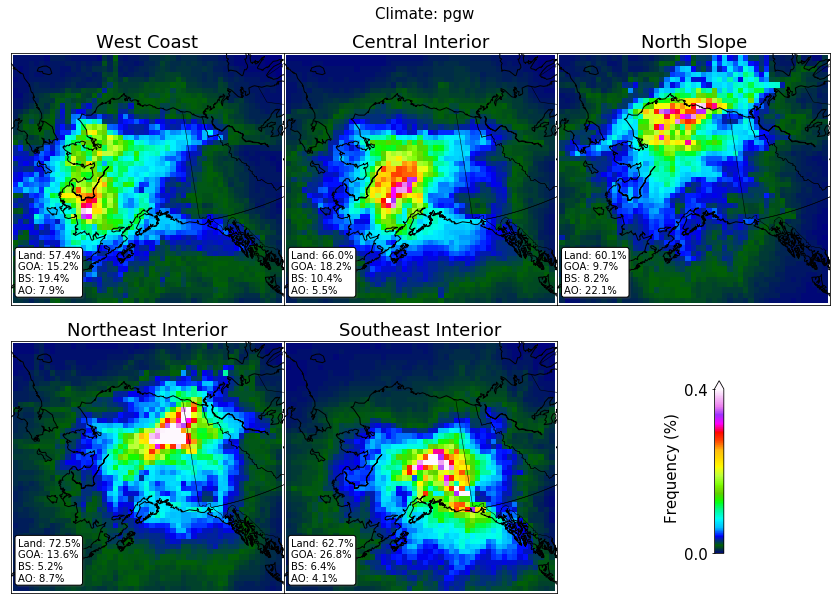

In [17]:
vmax_val=0.4

fig = plt.figure(figsize=(11.5,8.))
fig.suptitle(f'Climate: {which_climate}', fontsize=15, y=1.05)

ax1 = fig.add_axes([0.0, 0.5, 0.33, 0.5]) 
ax1.set_title(regions_to_str(1), fontsize=18)
pc = m.pcolormesh(reg1.lons.values, reg1.lats.values,
                  np.ma.masked_where(reg1==0, 100*(reg1/reg1.sum())),
                  cmap="gist_ncar", vmin=0, vmax=vmax_val)
ax1.text(0.025, 0.05, 
         u'Land: '+str(round(np.nansum(np.ma.masked_where(land.mask==False, reg1))/reg1.values.sum()*100, 1))+\
         '%\nGOA: '+str(round(np.nansum(np.ma.masked_where(goa.mask==False, reg1))/reg1.values.sum()*100, 1))+\
         '%\nBS: '+str(round(np.nansum(np.ma.masked_where(bs.mask==False, reg1))/reg1.values.sum()*100, 1))+\
         '%\nAO: '+str(round(np.nansum(np.ma.masked_where(ao.mask==False, reg1))/reg1.values.sum()*100, 1))+'%', 
         fontsize=10, alpha=1., color='k', zorder=6, transform=ax1.transAxes,
         bbox=dict(facecolor='w', edgecolor='k', alpha=1., linewidth=1., boxstyle='round', 
                   pad=0.25, path_effects=[path_effects.SimplePatchShadow(),path_effects.Normal()]))
m.drawstates()
m.drawcoastlines()
m.drawcountries()

ax2 = fig.add_axes([0.33, 0.5, 0.33, 0.5]) 
ax2.set_title(regions_to_str(3), fontsize=18)
pc = m.pcolormesh(reg3.lons.values, reg3.lats.values,
                  np.ma.masked_where(reg3==0, 100*(reg3/reg3.sum())),
                  cmap="gist_ncar", vmin=0, vmax=vmax_val)
ax2.text(0.025, 0.05, 
         u'Land: '+str(round(np.nansum(np.ma.masked_where(land.mask==False, reg3))/reg3.values.sum()*100, 1))+\
         '%\nGOA: '+str(round(np.nansum(np.ma.masked_where(goa.mask==False, reg3))/reg3.values.sum()*100, 1))+\
         '%\nBS: '+str(round(np.nansum(np.ma.masked_where(bs.mask==False, reg3))/reg3.values.sum()*100, 1))+\
         '%\nAO: '+str(round(np.nansum(np.ma.masked_where(ao.mask==False, reg3))/reg3.values.sum()*100, 1))+'%', 
         fontsize=10, alpha=1., color='k', zorder=6, transform=ax2.transAxes,
         bbox=dict(facecolor='w', edgecolor='k', alpha=1., linewidth=1., boxstyle='round', 
                   pad=0.25, path_effects=[path_effects.SimplePatchShadow(),path_effects.Normal()]))
m.drawstates()
m.drawcoastlines()
m.drawcountries()

ax3 = fig.add_axes([0.66, 0.5, 0.33, 0.5]) 
ax3.set_title(regions_to_str(4), fontsize=18)
pc = m.pcolormesh(reg4.lons.values, reg4.lats.values,
                  np.ma.masked_where(reg4==0, 100*(reg4/reg4.sum())),
                  cmap="gist_ncar", vmin=0, vmax=vmax_val)
ax3.text(0.025, 0.05, 
         u'Land: '+str(round(np.nansum(np.ma.masked_where(land.mask==False, reg4))/reg4.values.sum()*100, 1))+\
         '%\nGOA: '+str(round(np.nansum(np.ma.masked_where(goa.mask==False, reg4))/reg4.values.sum()*100, 1))+\
         '%\nBS: '+str(round(np.nansum(np.ma.masked_where(bs.mask==False, reg4))/reg4.values.sum()*100, 1))+\
         '%\nAO: '+str(round(np.nansum(np.ma.masked_where(ao.mask==False, reg4))/reg4.values.sum()*100, 1))+'%', 
         fontsize=10, alpha=1., color='k', zorder=6, transform=ax3.transAxes,
         bbox=dict(facecolor='w', edgecolor='k', alpha=1., linewidth=1., boxstyle='round', 
                   pad=0.25, path_effects=[path_effects.SimplePatchShadow(),path_effects.Normal()]))
m.drawstates()
m.drawcoastlines()
m.drawcountries()

ax4 = fig.add_axes([0.0, 0.0, 0.33, 0.5]) 
ax4.set_title(regions_to_str(5), fontsize=18)
pc = m.pcolormesh(reg5.lons.values, reg5.lats.values,
                  np.ma.masked_where(reg5==0, 100*(reg5/reg5.sum())),
                  cmap="gist_ncar", vmin=0, vmax=vmax_val)
ax4.text(0.025, 0.05, 
         u'Land: '+str(round(np.nansum(np.ma.masked_where(land.mask==False, reg5))/reg5.values.sum()*100, 1))+\
         '%\nGOA: '+str(round(np.nansum(np.ma.masked_where(goa.mask==False, reg5))/reg5.values.sum()*100, 1))+\
         '%\nBS: '+str(round(np.nansum(np.ma.masked_where(bs.mask==False, reg5))/reg5.values.sum()*100, 1))+\
         '%\nAO: '+str(round(np.nansum(np.ma.masked_where(ao.mask==False, reg5))/reg5.values.sum()*100, 1))+'%', 
         fontsize=10, alpha=1., color='k', zorder=6, transform=ax4.transAxes,
         bbox=dict(facecolor='w', edgecolor='k', alpha=1., linewidth=1., boxstyle='round', 
                   pad=0.25, path_effects=[path_effects.SimplePatchShadow(),path_effects.Normal()]))
m.drawstates()
m.drawcoastlines()
m.drawcountries()

ax5 = fig.add_axes([0.33, 0.0, 0.33, 0.5]) 
ax5.set_title(regions_to_str(6), fontsize=18)
pc = m.pcolormesh(reg6.lons.values, reg6.lats.values,
                  np.ma.masked_where(reg6==0, 100*(reg6/reg6.sum())),
                  cmap="gist_ncar", vmin=0, vmax=vmax_val)
ax5.text(0.025, 0.05, 
         u'Land: '+str(round(np.nansum(np.ma.masked_where(land.mask==False, reg6))/reg6.values.sum()*100, 1))+\
         '%\nGOA: '+str(round(np.nansum(np.ma.masked_where(goa.mask==False, reg6))/reg6.values.sum()*100, 1))+\
         '%\nBS: '+str(round(np.nansum(np.ma.masked_where(bs.mask==False, reg6))/reg6.values.sum()*100, 1))+\
         '%\nAO: '+str(round(np.nansum(np.ma.masked_where(ao.mask==False, reg6))/reg6.values.sum()*100, 1))+'%', 
         fontsize=10, alpha=1., color='k', zorder=6, transform=ax5.transAxes,
         bbox=dict(facecolor='w', edgecolor='k', alpha=1., linewidth=1., boxstyle='round', 
                   pad=0.25, path_effects=[path_effects.SimplePatchShadow(),path_effects.Normal()]))
m.drawstates()
m.drawcoastlines()
m.drawcountries()

cbar_ax = fig.add_axes([0.85, 0.1, 0.01125, 0.3])
bounds = [0, vmax_val]
newnorm=mpl.colors.Normalize(vmin=0, vmax=vmax_val)
cbar = mpl.colorbar.ColorbarBase(cbar_ax, cmap=plt.cm.get_cmap("gist_ncar"),
                                 norm=newnorm,
                                 ticks=bounds,
                                 orientation='vertical',
                                 extend='max')

cbar.set_label('Frequency (%)', fontsize=15) 
cbar.ax.tick_params(labelsize=15)
cbar_ax.yaxis.set_ticks_position('left')
cbar_ax.yaxis.set_label_position('left')

plt.savefig(f"/glade/work/molina/DATA/temp_figs/alaska_freq_{which_climate}.png", bbox_inches='tight', dpi=200)
plt.show()

In [35]:
which_climate='hist'

ds1=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jun_subregion1_{which_climate}.nc").relative_humidity
ds2=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jun_subregion3_{which_climate}.nc").relative_humidity
ds3=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jun_subregion4_{which_climate}.nc").relative_humidity
ds4=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jun_subregion5_{which_climate}.nc").relative_humidity
ds5=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jun_subregion6_{which_climate}.nc").relative_humidity

ds6=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jul_subregion1_{which_climate}.nc").relative_humidity
ds7=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jul_subregion3_{which_climate}.nc").relative_humidity
ds8=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jul_subregion4_{which_climate}.nc").relative_humidity
ds9=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jul_subregion5_{which_climate}.nc").relative_humidity
ds10=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jul_subregion6_{which_climate}.nc").relative_humidity

ds11=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_aug_subregion1_{which_climate}.nc").relative_humidity
ds12=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_aug_subregion3_{which_climate}.nc").relative_humidity
ds13=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_aug_subregion4_{which_climate}.nc").relative_humidity
ds14=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_aug_subregion5_{which_climate}.nc").relative_humidity
ds15=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_aug_subregion6_{which_climate}.nc").relative_humidity

reg1=np.nanmean([ds1,ds6,ds11],axis=0)
reg3=np.nanmean([ds2,ds7,ds12],axis=0)
reg4=np.nanmean([ds3,ds8,ds13],axis=0)
reg5=np.nanmean([ds4,ds9,ds14],axis=0)
reg6=np.nanmean([ds5,ds10,ds15],axis=0)

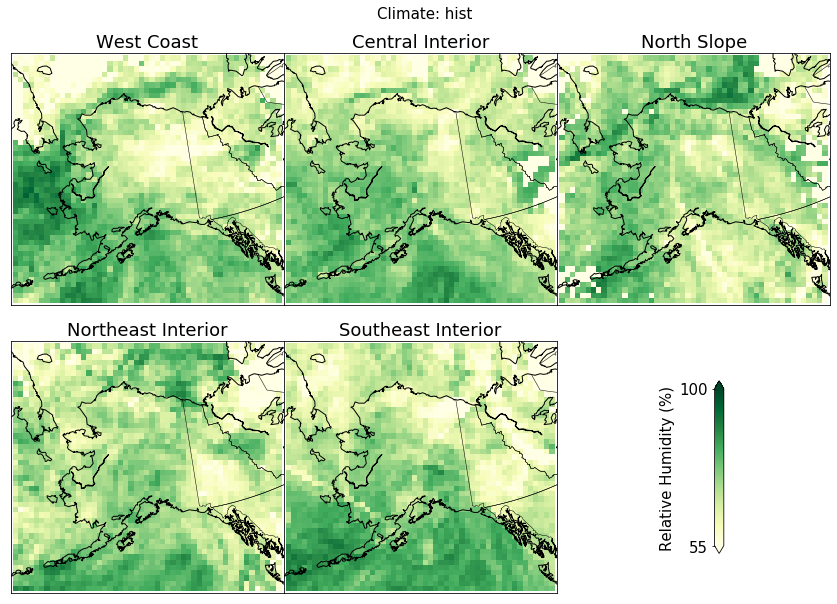

In [39]:
vmin_val=55
vmax_val=100

fig = plt.figure(figsize=(11.5,8.))
fig.suptitle(f'Climate: {which_climate}', fontsize=15, y=1.05)

ax1 = fig.add_axes([0.0, 0.5, 0.33, 0.5]) 
ax1.set_title(regions_to_str(1), fontsize=18)
pc = m.pcolormesh(ds1.lons.values, ds1.lats.values,
                  np.ma.masked_where(reg1==0, reg1),
                  cmap="YlGn", vmin=vmin_val, vmax=vmax_val)
m.drawstates()
m.drawcoastlines()
m.drawcountries()

ax2 = fig.add_axes([0.33, 0.5, 0.33, 0.5]) 
ax2.set_title(regions_to_str(3), fontsize=18)
pc = m.pcolormesh(ds1.lons.values, ds1.lats.values,
                  np.ma.masked_where(reg3==0, reg3),
                  cmap="YlGn", vmin=vmin_val, vmax=vmax_val)
m.drawstates()
m.drawcoastlines()
m.drawcountries()

ax3 = fig.add_axes([0.66, 0.5, 0.33, 0.5]) 
ax3.set_title(regions_to_str(4), fontsize=18)
pc = m.pcolormesh(ds1.lons.values, ds1.lats.values,
                  np.ma.masked_where(reg4==0, reg4),
                  cmap="YlGn", vmin=vmin_val, vmax=vmax_val)
m.drawstates()
m.drawcoastlines()
m.drawcountries()

ax4 = fig.add_axes([0.0, 0.0, 0.33, 0.5]) 
ax4.set_title(regions_to_str(5), fontsize=18)
pc = m.pcolormesh(ds1.lons.values, ds1.lats.values,
                  np.ma.masked_where(reg5==0, reg5),
                  cmap="YlGn", vmin=vmin_val, vmax=vmax_val)
m.drawstates()
m.drawcoastlines()
m.drawcountries()

ax5 = fig.add_axes([0.33, 0.0, 0.33, 0.5]) 
ax5.set_title(regions_to_str(6), fontsize=18)
pc = m.pcolormesh(ds1.lons.values, ds1.lats.values,
                  np.ma.masked_where(reg6==0, reg6),
                  cmap="YlGn", vmin=vmin_val, vmax=vmax_val)
m.drawstates()
m.drawcoastlines()
m.drawcountries()

cbar_ax = fig.add_axes([0.85, 0.1, 0.01125, 0.3])
bounds = [vmin_val, vmax_val]
newnorm=mpl.colors.Normalize(vmin=vmin_val, vmax=vmax_val)
cbar = mpl.colorbar.ColorbarBase(cbar_ax, cmap=plt.cm.get_cmap("YlGn"),
                                 norm=newnorm,
                                 ticks=bounds,
                                 orientation='vertical',
                                 extend='both')

cbar.set_label('Relative Humidity (%)', fontsize=15) 
cbar.ax.tick_params(labelsize=15)
cbar_ax.yaxis.set_ticks_position('left')
cbar_ax.yaxis.set_label_position('left')

plt.savefig(f"/glade/work/molina/DATA/temp_figs/alaska_rh_{which_climate}.png", bbox_inches='tight', dpi=200)
plt.show()

In [40]:
which_climate='pgw'

ds1=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jun_subregion1_{which_climate}.nc").relative_humidity
ds2=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jun_subregion3_{which_climate}.nc").relative_humidity
ds3=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jun_subregion4_{which_climate}.nc").relative_humidity
ds4=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jun_subregion5_{which_climate}.nc").relative_humidity
ds5=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jun_subregion6_{which_climate}.nc").relative_humidity

ds6=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jul_subregion1_{which_climate}.nc").relative_humidity
ds7=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jul_subregion3_{which_climate}.nc").relative_humidity
ds8=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jul_subregion4_{which_climate}.nc").relative_humidity
ds9=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jul_subregion5_{which_climate}.nc").relative_humidity
ds10=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jul_subregion6_{which_climate}.nc").relative_humidity

ds11=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_aug_subregion1_{which_climate}.nc").relative_humidity
ds12=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_aug_subregion3_{which_climate}.nc").relative_humidity
ds13=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_aug_subregion4_{which_climate}.nc").relative_humidity
ds14=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_aug_subregion5_{which_climate}.nc").relative_humidity
ds15=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_aug_subregion6_{which_climate}.nc").relative_humidity

reg1=np.nanmean([ds1,ds6,ds11],axis=0)
reg3=np.nanmean([ds2,ds7,ds12],axis=0)
reg4=np.nanmean([ds3,ds8,ds13],axis=0)
reg5=np.nanmean([ds4,ds9,ds14],axis=0)
reg6=np.nanmean([ds5,ds10,ds15],axis=0)

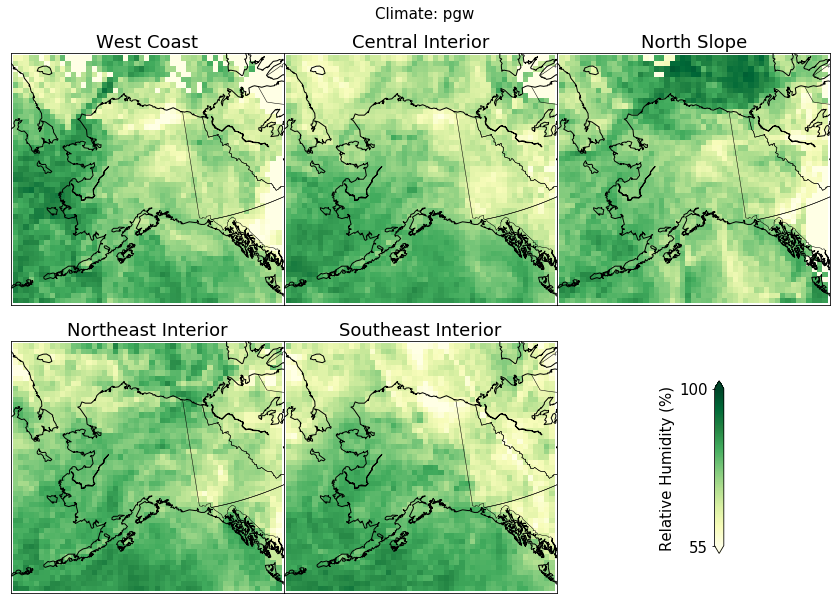

In [41]:
vmin_val=55
vmax_val=100

fig = plt.figure(figsize=(11.5,8.))
fig.suptitle(f'Climate: {which_climate}', fontsize=15, y=1.05)

ax1 = fig.add_axes([0.0, 0.5, 0.33, 0.5]) 
ax1.set_title(regions_to_str(1), fontsize=18)
pc = m.pcolormesh(ds1.lons.values, ds1.lats.values,
                  np.ma.masked_where(reg1==0, reg1),
                  cmap="YlGn", vmin=vmin_val, vmax=vmax_val)
m.drawstates()
m.drawcoastlines()
m.drawcountries()

ax2 = fig.add_axes([0.33, 0.5, 0.33, 0.5]) 
ax2.set_title(regions_to_str(3), fontsize=18)
pc = m.pcolormesh(ds1.lons.values, ds1.lats.values,
                  np.ma.masked_where(reg3==0, reg3),
                  cmap="YlGn", vmin=vmin_val, vmax=vmax_val)
m.drawstates()
m.drawcoastlines()
m.drawcountries()

ax3 = fig.add_axes([0.66, 0.5, 0.33, 0.5]) 
ax3.set_title(regions_to_str(4), fontsize=18)
pc = m.pcolormesh(ds1.lons.values, ds1.lats.values,
                  np.ma.masked_where(reg4==0, reg4),
                  cmap="YlGn", vmin=vmin_val, vmax=vmax_val)
m.drawstates()
m.drawcoastlines()
m.drawcountries()

ax4 = fig.add_axes([0.0, 0.0, 0.33, 0.5]) 
ax4.set_title(regions_to_str(5), fontsize=18)
pc = m.pcolormesh(ds1.lons.values, ds1.lats.values,
                  np.ma.masked_where(reg5==0, reg5),
                  cmap="YlGn", vmin=vmin_val, vmax=vmax_val)
m.drawstates()
m.drawcoastlines()
m.drawcountries()

ax5 = fig.add_axes([0.33, 0.0, 0.33, 0.5]) 
ax5.set_title(regions_to_str(6), fontsize=18)
pc = m.pcolormesh(ds1.lons.values, ds1.lats.values,
                  np.ma.masked_where(reg6==0, reg6),
                  cmap="YlGn", vmin=vmin_val, vmax=vmax_val)
m.drawstates()
m.drawcoastlines()
m.drawcountries()

cbar_ax = fig.add_axes([0.85, 0.1, 0.01125, 0.3])
bounds = [vmin_val, vmax_val]
newnorm=mpl.colors.Normalize(vmin=vmin_val, vmax=vmax_val)
cbar = mpl.colorbar.ColorbarBase(cbar_ax, cmap=plt.cm.get_cmap("YlGn"),
                                 norm=newnorm,
                                 ticks=bounds,
                                 orientation='vertical',
                                 extend='both')

cbar.set_label('Relative Humidity (%)', fontsize=15) 
cbar.ax.tick_params(labelsize=15)
cbar_ax.yaxis.set_ticks_position('left')
cbar_ax.yaxis.set_label_position('left')

plt.savefig(f"/glade/work/molina/DATA/temp_figs/alaska_rh_{which_climate}.png", bbox_inches='tight', dpi=200)
plt.show()

In [57]:
which_climate='hist'

ds1=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jun_subregion1_{which_climate}.nc").moisture_flux
ds2=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jun_subregion3_{which_climate}.nc").moisture_flux
ds3=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jun_subregion4_{which_climate}.nc").moisture_flux
ds4=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jun_subregion5_{which_climate}.nc").moisture_flux
ds5=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jun_subregion6_{which_climate}.nc").moisture_flux

ds6=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jul_subregion1_{which_climate}.nc").moisture_flux
ds7=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jul_subregion3_{which_climate}.nc").moisture_flux
ds8=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jul_subregion4_{which_climate}.nc").moisture_flux
ds9=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jul_subregion5_{which_climate}.nc").moisture_flux
ds10=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jul_subregion6_{which_climate}.nc").moisture_flux

ds11=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_aug_subregion1_{which_climate}.nc").moisture_flux
ds12=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_aug_subregion3_{which_climate}.nc").moisture_flux
ds13=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_aug_subregion4_{which_climate}.nc").moisture_flux
ds14=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_aug_subregion5_{which_climate}.nc").moisture_flux
ds15=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_aug_subregion6_{which_climate}.nc").moisture_flux

reg1=np.nanmean([ds1,ds6,ds11],axis=0)
reg3=np.nanmean([ds2,ds7,ds12],axis=0)
reg4=np.nanmean([ds3,ds8,ds13],axis=0)
reg5=np.nanmean([ds4,ds9,ds14],axis=0)
reg6=np.nanmean([ds5,ds10,ds15],axis=0)

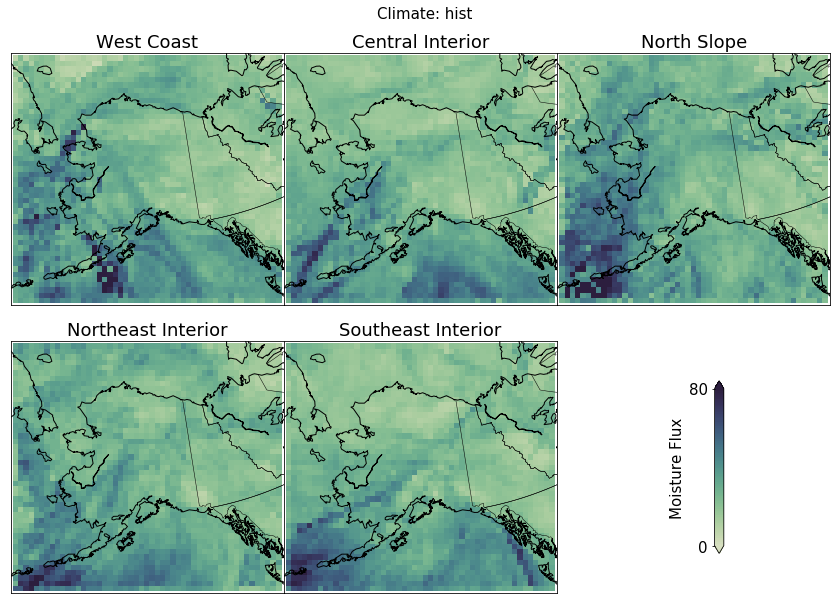

In [58]:
vmin_val=0
vmax_val=80

fig = plt.figure(figsize=(11.5,8.))
fig.suptitle(f'Climate: {which_climate}', fontsize=15, y=1.05)

ax1 = fig.add_axes([0.0, 0.5, 0.33, 0.5]) 
ax1.set_title(regions_to_str(1), fontsize=18)
pc = m.pcolormesh(ds1.lons.values, ds1.lats.values,
                  np.ma.masked_where(reg1==0, reg1),
                  cmap=cmap, vmin=vmin_val, vmax=vmax_val)
m.drawstates()
m.drawcoastlines()
m.drawcountries()

ax2 = fig.add_axes([0.33, 0.5, 0.33, 0.5]) 
ax2.set_title(regions_to_str(3), fontsize=18)
pc = m.pcolormesh(ds1.lons.values, ds1.lats.values,
                  np.ma.masked_where(reg3==0, reg3),
                  cmap=cmap, vmin=vmin_val, vmax=vmax_val)
m.drawstates()
m.drawcoastlines()
m.drawcountries()

ax3 = fig.add_axes([0.66, 0.5, 0.33, 0.5]) 
ax3.set_title(regions_to_str(4), fontsize=18)
pc = m.pcolormesh(ds1.lons.values, ds1.lats.values,
                  np.ma.masked_where(reg4==0, reg4),
                  cmap=cmap, vmin=vmin_val, vmax=vmax_val)
m.drawstates()
m.drawcoastlines()
m.drawcountries()

ax4 = fig.add_axes([0.0, 0.0, 0.33, 0.5]) 
ax4.set_title(regions_to_str(5), fontsize=18)
pc = m.pcolormesh(ds1.lons.values, ds1.lats.values,
                  np.ma.masked_where(reg5==0, reg5),
                  cmap=cmap, vmin=vmin_val, vmax=vmax_val)
m.drawstates()
m.drawcoastlines()
m.drawcountries()

ax5 = fig.add_axes([0.33, 0.0, 0.33, 0.5]) 
ax5.set_title(regions_to_str(6), fontsize=18)
pc = m.pcolormesh(ds1.lons.values, ds1.lats.values,
                  np.ma.masked_where(reg6==0, reg6),
                  cmap=cmap, vmin=vmin_val, vmax=vmax_val)
m.drawstates()
m.drawcoastlines()
m.drawcountries()

cbar_ax = fig.add_axes([0.85, 0.1, 0.01125, 0.3])
bounds = [vmin_val, vmax_val]
newnorm=mpl.colors.Normalize(vmin=vmin_val, vmax=vmax_val)
cbar = mpl.colorbar.ColorbarBase(cbar_ax, cmap=cmap,
                                 norm=newnorm,
                                 ticks=bounds,
                                 orientation='vertical',
                                 extend='both')

cbar.set_label('Moisture Flux', fontsize=15) 
cbar.ax.tick_params(labelsize=15)
cbar_ax.yaxis.set_ticks_position('left')
cbar_ax.yaxis.set_label_position('left')

plt.savefig(f"/glade/work/molina/DATA/temp_figs/alaska_mf_{which_climate}.png", bbox_inches='tight', dpi=200)
plt.show()

In [63]:
which_climate='pgw'

ds1=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jun_subregion1_{which_climate}.nc").moisture_flux
ds2=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jun_subregion3_{which_climate}.nc").moisture_flux
ds3=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jun_subregion4_{which_climate}.nc").moisture_flux
ds4=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jun_subregion5_{which_climate}.nc").moisture_flux
ds5=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jun_subregion6_{which_climate}.nc").moisture_flux

ds6=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jul_subregion1_{which_climate}.nc").moisture_flux
ds7=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jul_subregion3_{which_climate}.nc").moisture_flux
ds8=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jul_subregion4_{which_climate}.nc").moisture_flux
ds9=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jul_subregion5_{which_climate}.nc").moisture_flux
ds10=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jul_subregion6_{which_climate}.nc").moisture_flux

ds11=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_aug_subregion1_{which_climate}.nc").moisture_flux
ds12=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_aug_subregion3_{which_climate}.nc").moisture_flux
ds13=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_aug_subregion4_{which_climate}.nc").moisture_flux
ds14=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_aug_subregion5_{which_climate}.nc").moisture_flux
ds15=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_aug_subregion6_{which_climate}.nc").moisture_flux

reg1=np.nanmean([ds1,ds6,ds11],axis=0)
reg3=np.nanmean([ds2,ds7,ds12],axis=0)
reg4=np.nanmean([ds3,ds8,ds13],axis=0)
reg5=np.nanmean([ds4,ds9,ds14],axis=0)
reg6=np.nanmean([ds5,ds10,ds15],axis=0)

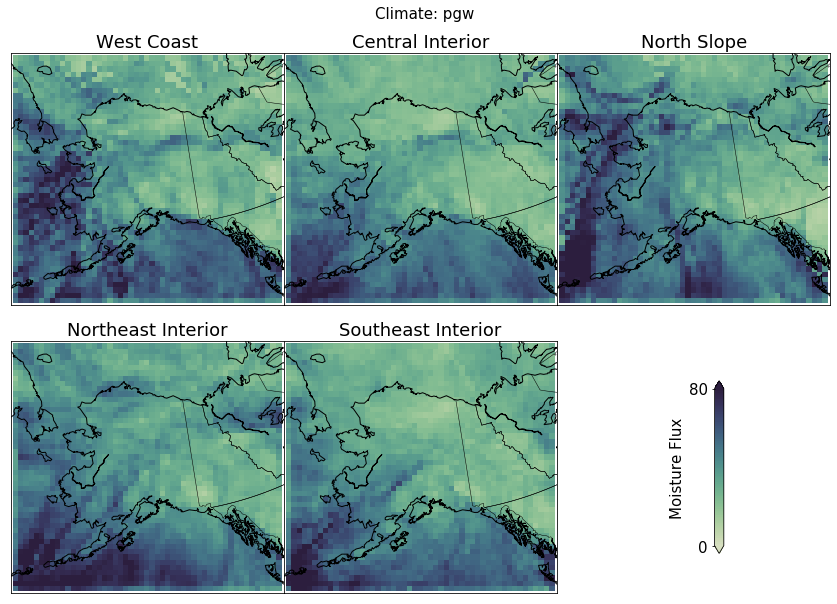

In [56]:
vmin_val=0
vmax_val=80

fig = plt.figure(figsize=(11.5,8.))
fig.suptitle(f'Climate: {which_climate}', fontsize=15, y=1.05)

ax1 = fig.add_axes([0.0, 0.5, 0.33, 0.5]) 
ax1.set_title(regions_to_str(1), fontsize=18)
pc = m.pcolormesh(ds1.lons.values, ds1.lats.values,
                  np.ma.masked_where(reg1==0, reg1),
                  cmap=cmap, vmin=vmin_val, vmax=vmax_val)
m.drawstates()
m.drawcoastlines()
m.drawcountries()

ax2 = fig.add_axes([0.33, 0.5, 0.33, 0.5]) 
ax2.set_title(regions_to_str(3), fontsize=18)
pc = m.pcolormesh(ds1.lons.values, ds1.lats.values,
                  np.ma.masked_where(reg3==0, reg3),
                  cmap=cmap, vmin=vmin_val, vmax=vmax_val)
m.drawstates()
m.drawcoastlines()
m.drawcountries()

ax3 = fig.add_axes([0.66, 0.5, 0.33, 0.5]) 
ax3.set_title(regions_to_str(4), fontsize=18)
pc = m.pcolormesh(ds1.lons.values, ds1.lats.values,
                  np.ma.masked_where(reg4==0, reg4),
                  cmap=cmap, vmin=vmin_val, vmax=vmax_val)
m.drawstates()
m.drawcoastlines()
m.drawcountries()

ax4 = fig.add_axes([0.0, 0.0, 0.33, 0.5]) 
ax4.set_title(regions_to_str(5), fontsize=18)
pc = m.pcolormesh(ds1.lons.values, ds1.lats.values,
                  np.ma.masked_where(reg5==0, reg5),
                  cmap=cmap, vmin=vmin_val, vmax=vmax_val)
m.drawstates()
m.drawcoastlines()
m.drawcountries()

ax5 = fig.add_axes([0.33, 0.0, 0.33, 0.5]) 
ax5.set_title(regions_to_str(6), fontsize=18)
pc = m.pcolormesh(ds1.lons.values, ds1.lats.values,
                  np.ma.masked_where(reg6==0, reg6),
                  cmap=cmap, vmin=vmin_val, vmax=vmax_val)
m.drawstates()
m.drawcoastlines()
m.drawcountries()

cbar_ax = fig.add_axes([0.85, 0.1, 0.01125, 0.3])
bounds = [vmin_val, vmax_val]
newnorm=mpl.colors.Normalize(vmin=vmin_val, vmax=vmax_val)
cbar = mpl.colorbar.ColorbarBase(cbar_ax, cmap=cmap,
                                 norm=newnorm,
                                 ticks=bounds,
                                 orientation='vertical',
                                 extend='both')

cbar.set_label('Moisture Flux', fontsize=15) 
cbar.ax.tick_params(labelsize=15)
cbar_ax.yaxis.set_ticks_position('left')
cbar_ax.yaxis.set_label_position('left')

plt.savefig(f"/glade/work/molina/DATA/temp_figs/alaska_mf_{which_climate}.png", bbox_inches='tight', dpi=200)
plt.show()

In [59]:
which_climate='hist'

ds1=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jun_subregion1_{which_climate}.nc").moisture_flux
ds2=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jun_subregion3_{which_climate}.nc").moisture_flux
ds3=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jun_subregion4_{which_climate}.nc").moisture_flux
ds4=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jun_subregion5_{which_climate}.nc").moisture_flux
ds5=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jun_subregion6_{which_climate}.nc").moisture_flux

ds6=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jul_subregion1_{which_climate}.nc").moisture_flux
ds7=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jul_subregion3_{which_climate}.nc").moisture_flux
ds8=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jul_subregion4_{which_climate}.nc").moisture_flux
ds9=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jul_subregion5_{which_climate}.nc").moisture_flux
ds10=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jul_subregion6_{which_climate}.nc").moisture_flux

ds11=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_aug_subregion1_{which_climate}.nc").moisture_flux
ds12=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_aug_subregion3_{which_climate}.nc").moisture_flux
ds13=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_aug_subregion4_{which_climate}.nc").moisture_flux
ds14=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_aug_subregion5_{which_climate}.nc").moisture_flux
ds15=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_aug_subregion6_{which_climate}.nc").moisture_flux

reg1c=np.nanmean([ds1,ds6,ds11],axis=0)
reg3c=np.nanmean([ds2,ds7,ds12],axis=0)
reg4c=np.nanmean([ds3,ds8,ds13],axis=0)
reg5c=np.nanmean([ds4,ds9,ds14],axis=0)
reg6c=np.nanmean([ds5,ds10,ds15],axis=0)

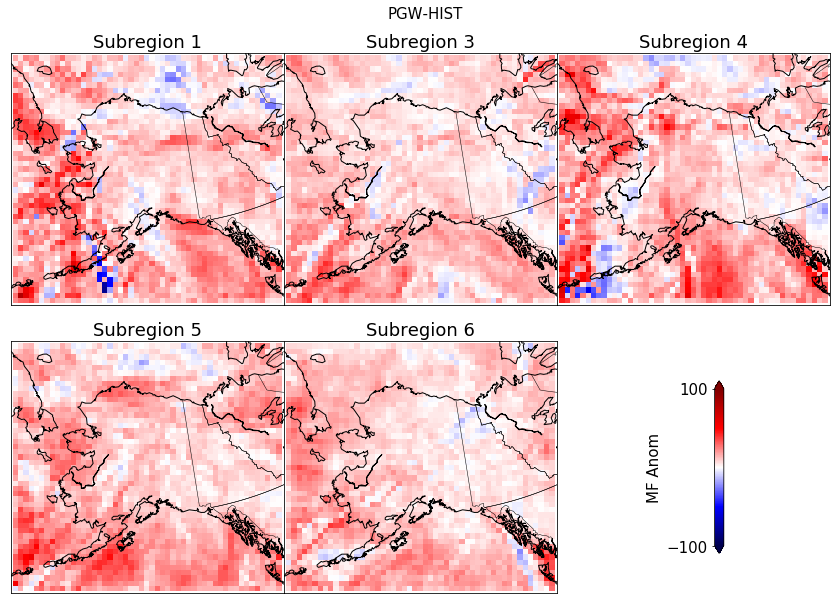

In [64]:
vmin_val=-100
vmax_val=100

fig = plt.figure(figsize=(11.5,8.))
fig.suptitle(f'PGW-HIST', fontsize=15, y=1.05)

ax1 = fig.add_axes([0.0, 0.5, 0.33, 0.5]) 
ax1.set_title('Subregion 1', fontsize=18)
pc = m.pcolormesh(ds1.lons.values, ds1.lats.values, 
                  reg1-reg1c, cmap="seismic", vmin=vmin_val, vmax=vmax_val)
m.drawstates()
m.drawcoastlines()
m.drawcountries()

ax2 = fig.add_axes([0.33, 0.5, 0.33, 0.5]) 
ax2.set_title('Subregion 3', fontsize=18)
pc = m.pcolormesh(ds1.lons.values, ds1.lats.values, 
                  reg3-reg3c, cmap="seismic", vmin=vmin_val, vmax=vmax_val)
m.drawstates()
m.drawcoastlines()
m.drawcountries()

ax3 = fig.add_axes([0.66, 0.5, 0.33, 0.5]) 
ax3.set_title('Subregion 4', fontsize=18)
pc = m.pcolormesh(ds1.lons.values, ds1.lats.values, 
                  reg4-reg4c, cmap="seismic", vmin=vmin_val, vmax=vmax_val)
m.drawstates()
m.drawcoastlines()
m.drawcountries()

ax4 = fig.add_axes([0.0, 0.0, 0.33, 0.5]) 
ax4.set_title('Subregion 5', fontsize=18)
pc = m.pcolormesh(ds1.lons.values, ds1.lats.values, 
                  reg5-reg5c, cmap="seismic", vmin=vmin_val, vmax=vmax_val)
m.drawstates()
m.drawcoastlines()
m.drawcountries()

ax5 = fig.add_axes([0.33, 0.0, 0.33, 0.5]) 
ax5.set_title('Subregion 6', fontsize=18)
pc = m.pcolormesh(ds1.lons.values, ds1.lats.values, 
                  reg6-reg6c, cmap="seismic", vmin=vmin_val, vmax=vmax_val)
m.drawstates()
m.drawcoastlines()
m.drawcountries()

cbar_ax = fig.add_axes([0.85, 0.1, 0.01125, 0.3])
bounds = [vmin_val, vmax_val]
newnorm=mpl.colors.Normalize(vmin=vmin_val, vmax=vmax_val)
cbar = mpl.colorbar.ColorbarBase(cbar_ax, cmap=plt.cm.get_cmap("seismic"),
                                 norm=newnorm,
                                 ticks=bounds,
                                 orientation='vertical',
                                 extend='both')

cbar.set_label('MF Anom', fontsize=15) 
cbar.ax.tick_params(labelsize=15)
cbar_ax.yaxis.set_ticks_position('left')
cbar_ax.yaxis.set_label_position('left')

plt.savefig(f"/glade/work/molina/DATA/temp_figs/alaska_mfanom.png", bbox_inches='tight', dpi=200)
plt.show()

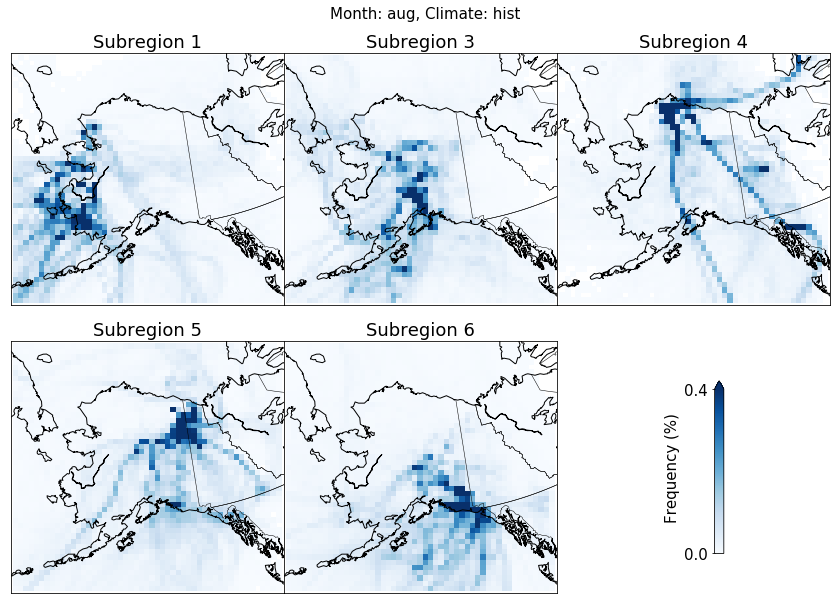

In [4]:
vmax_val=0.4
which_month='aug'
which_climate='hist'

fig = plt.figure(figsize=(11.5,8.))
fig.suptitle(f'Month: {which_month}, Climate: {which_climate}', fontsize=15, y=1.05)

ds=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_{which_month}_subregion1_{which_climate}.nc")
ax1 = fig.add_axes([0.0, 0.5, 0.33, 0.5]) 
ax1.set_title('Subregion 1', fontsize=18)
pc = m.pcolormesh(ds.lons.values, ds.lats.values, 
                  np.ma.masked_where(ds.frequency==0, 100*(ds.frequency/ds.frequency.sum())),
                  cmap="Blues", vmin=0, vmax=vmax_val)
m.drawstates()
m.drawcoastlines()
m.drawcountries()

ds=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_{which_month}_subregion3_{which_climate}.nc")
ax2 = fig.add_axes([0.33, 0.5, 0.33, 0.5]) 
ax2.set_title('Subregion 3', fontsize=18)
pc = m.pcolormesh(ds.lons.values, ds.lats.values, 
                  np.ma.masked_where(ds.frequency==0, 100*(ds.frequency/ds.frequency.sum())),
                  cmap="Blues", vmin=0, vmax=vmax_val)
m.drawstates()
m.drawcoastlines()
m.drawcountries()

ds=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_{which_month}_subregion4_{which_climate}.nc")
ax3 = fig.add_axes([0.66, 0.5, 0.33, 0.5]) 
ax3.set_title('Subregion 4', fontsize=18)
pc = m.pcolormesh(ds.lons.values, ds.lats.values, 
                  np.ma.masked_where(ds.frequency==0, 100*(ds.frequency/ds.frequency.sum())),
                  cmap="Blues", vmin=0, vmax=vmax_val)
m.drawstates()
m.drawcoastlines()
m.drawcountries()

ds=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_{which_month}_subregion5_{which_climate}.nc")
ax4 = fig.add_axes([0.0, 0.0, 0.33, 0.5]) 
ax4.set_title('Subregion 5', fontsize=18)
pc = m.pcolormesh(ds.lons.values, ds.lats.values, 
                  np.ma.masked_where(ds.frequency==0, 100*(ds.frequency/ds.frequency.sum())),
                  cmap="Blues", vmin=0, vmax=vmax_val)
m.drawstates()
m.drawcoastlines()
m.drawcountries()

ds=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_{which_month}_subregion6_{which_climate}.nc")
ax5 = fig.add_axes([0.33, 0.0, 0.33, 0.5]) 
ax5.set_title('Subregion 6', fontsize=18)
pc = m.pcolormesh(ds.lons.values, ds.lats.values, 
                  np.ma.masked_where(ds.frequency==0, 100*(ds.frequency/ds.frequency.sum())),
                  cmap="Blues", vmin=0, vmax=vmax_val)
m.drawstates()
m.drawcoastlines()
m.drawcountries()

cbar_ax = fig.add_axes([0.85, 0.1, 0.01125, 0.3])
bounds = [0, vmax_val]
newnorm=mpl.colors.Normalize(vmin=0, vmax=vmax_val)
cbar = mpl.colorbar.ColorbarBase(cbar_ax, cmap=plt.cm.get_cmap("Blues"),
                                 norm=newnorm,
                                 ticks=bounds,
                                 orientation='vertical',
                                 extend='max')

cbar.set_label('Frequency (%)', fontsize=15) 
cbar.ax.tick_params(labelsize=15)
cbar_ax.yaxis.set_ticks_position('left')
cbar_ax.yaxis.set_label_position('left')

plt.savefig(f"/glade/work/molina/DATA/temp_figs/alaska_freq_{which_climate}_{which_month}.png", bbox_inches='tight', dpi=200)
plt.show()

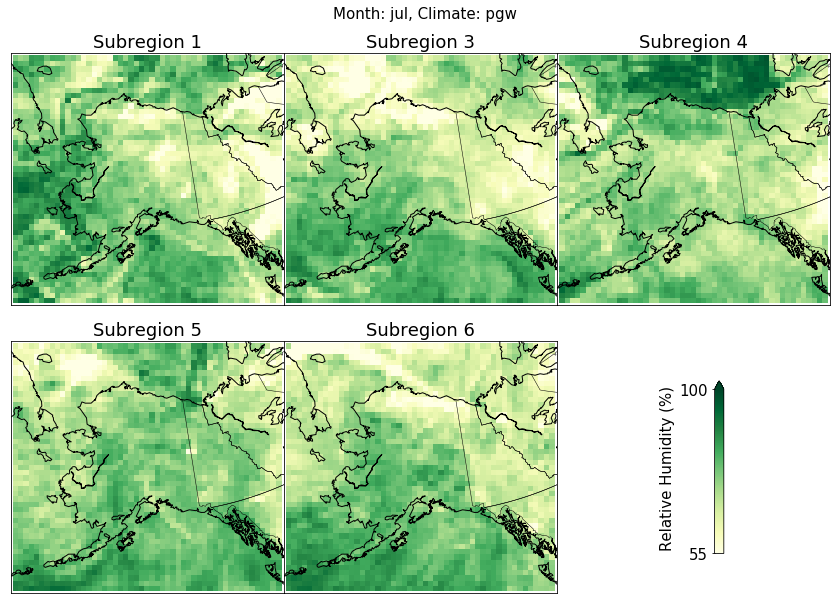

In [6]:
vmin_val=55
vmax_val=100
which_month='jul'
which_climate='pgw'

fig = plt.figure(figsize=(11.5,8.))
fig.suptitle(f'Month: {which_month}, Climate: {which_climate}', fontsize=15, y=1.05)

try:
    ds=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_{which_month}_subregion1_{which_climate}.nc")
    ax1 = fig.add_axes([0.0, 0.5, 0.33, 0.5]) 
    ax1.set_title('Subregion 1', fontsize=18)
    pc = m.pcolormesh(ds.lons.values, ds.lats.values, 
                      np.ma.masked_where(ds.frequency==0, ds.relative_humidity),
                      cmap="YlGn", vmin=vmin_val, vmax=vmax_val)
    m.drawstates()
    m.drawcoastlines()
    m.drawcountries()
except AttributeError:
    print("what")

try:
    ds=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_{which_month}_subregion3_{which_climate}.nc")
    ax2 = fig.add_axes([0.33, 0.5, 0.33, 0.5]) 
    ax2.set_title('Subregion 3', fontsize=18)
    pc = m.pcolormesh(ds.lons.values, ds.lats.values, 
                      np.ma.masked_where(ds.frequency==0, ds.relative_humidity),
                      cmap="YlGn", vmin=vmin_val, vmax=vmax_val)
    m.drawstates()
    m.drawcoastlines()
    m.drawcountries()
except AttributeError:
    print("what")

try:
    ds=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_{which_month}_subregion4_{which_climate}.nc")
    ax3 = fig.add_axes([0.66, 0.5, 0.33, 0.5]) 
    ax3.set_title('Subregion 4', fontsize=18)
    pc = m.pcolormesh(ds.lons.values, ds.lats.values, 
                      np.ma.masked_where(ds.frequency==0, ds.relative_humidity),
                      cmap="YlGn", vmin=vmin_val, vmax=vmax_val)
    m.drawstates()
    m.drawcoastlines()
    m.drawcountries()
except AttributeError:
    print("what")

try:
    ds=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_{which_month}_subregion5_{which_climate}.nc")
    ax4 = fig.add_axes([0.0, 0.0, 0.33, 0.5]) 
    ax4.set_title('Subregion 5', fontsize=18)
    pc = m.pcolormesh(ds.lons.values, ds.lats.values, 
                      np.ma.masked_where(ds.frequency==0, ds.relative_humidity),
                      cmap="YlGn", vmin=vmin_val, vmax=vmax_val)
    m.drawstates()
    m.drawcoastlines()
    m.drawcountries()
except AttributeError:
    print("what")

try:
    ds=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_{which_month}_subregion6_{which_climate}.nc")
    ax5 = fig.add_axes([0.33, 0.0, 0.33, 0.5]) 
    ax5.set_title('Subregion 6', fontsize=18)
    pc = m.pcolormesh(ds.lons.values, ds.lats.values, 
                      np.ma.masked_where(ds.frequency==0, ds.relative_humidity),
                      cmap="YlGn", vmin=vmin_val, vmax=vmax_val)
    m.drawstates()
    m.drawcoastlines()
    m.drawcountries()
except AttributeError:
    print("what")

cbar_ax = fig.add_axes([0.85, 0.1, 0.01125, 0.3])
bounds = [vmin_val, vmax_val]
newnorm=mpl.colors.Normalize(vmin=vmin_val, vmax=vmax_val)
cbar = mpl.colorbar.ColorbarBase(cbar_ax, cmap=plt.cm.get_cmap("YlGn"),
                                 norm=newnorm,
                                 ticks=bounds,
                                 orientation='vertical',
                                 extend='max')

cbar.set_label('Relative Humidity (%)', fontsize=15) 
cbar.ax.tick_params(labelsize=15)
cbar_ax.yaxis.set_ticks_position('left')
cbar_ax.yaxis.set_label_position('left')

plt.savefig(f"/glade/work/molina/DATA/temp_figs/alaska_rh_{which_climate}_{which_month}.png", bbox_inches='tight', dpi=200)
plt.show()

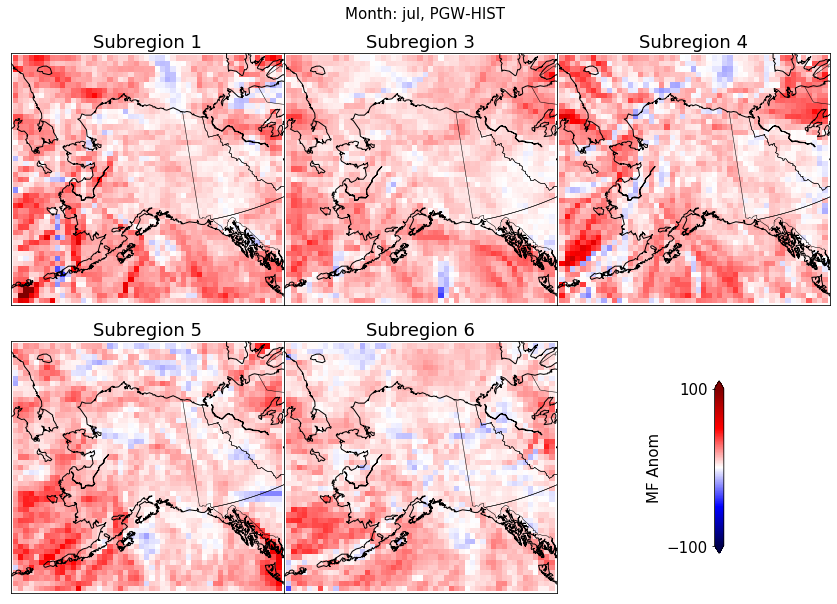

In [70]:
vmin_val=-100
vmax_val=100
which_month='jul'
which_climate1='hist'
which_climate2='pgw'

fig = plt.figure(figsize=(11.5,8.))
fig.suptitle(f'Month: {which_month}, PGW-HIST', fontsize=15, y=1.05)

dsc=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_{which_month}_subregion1_{which_climate1}.nc")
dsf=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_{which_month}_subregion1_{which_climate2}.nc")
ax1 = fig.add_axes([0.0, 0.5, 0.33, 0.5]) 
ax1.set_title('Subregion 1', fontsize=18)
pc = m.pcolormesh(ds.lons.values, ds.lats.values, 
                  dsf.moisture_flux-dsc.moisture_flux, cmap="seismic", vmin=vmin_val, vmax=vmax_val)
m.drawstates()
m.drawcoastlines()
m.drawcountries()

dsc=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_{which_month}_subregion3_{which_climate1}.nc")
dsf=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_{which_month}_subregion3_{which_climate2}.nc")
ax2 = fig.add_axes([0.33, 0.5, 0.33, 0.5]) 
ax2.set_title('Subregion 3', fontsize=18)
pc = m.pcolormesh(ds.lons.values, ds.lats.values, 
                  dsf.moisture_flux-dsc.moisture_flux, cmap="seismic", vmin=vmin_val, vmax=vmax_val)
m.drawstates()
m.drawcoastlines()
m.drawcountries()

dsc=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_{which_month}_subregion4_{which_climate1}.nc")
dsf=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_{which_month}_subregion4_{which_climate2}.nc")
ax3 = fig.add_axes([0.66, 0.5, 0.33, 0.5]) 
ax3.set_title('Subregion 4', fontsize=18)
pc = m.pcolormesh(ds.lons.values, ds.lats.values, 
                  dsf.moisture_flux-dsc.moisture_flux, cmap="seismic", vmin=vmin_val, vmax=vmax_val)
m.drawstates()
m.drawcoastlines()
m.drawcountries()

dsc=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_{which_month}_subregion5_{which_climate1}.nc")
dsf=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_{which_month}_subregion5_{which_climate2}.nc")
ax4 = fig.add_axes([0.0, 0.0, 0.33, 0.5]) 
ax4.set_title('Subregion 5', fontsize=18)
pc = m.pcolormesh(ds.lons.values, ds.lats.values, 
                  dsf.moisture_flux-dsc.moisture_flux, cmap="seismic", vmin=vmin_val, vmax=vmax_val)
m.drawstates()
m.drawcoastlines()
m.drawcountries()

dsc=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_{which_month}_subregion6_{which_climate1}.nc")
dsf=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_{which_month}_subregion6_{which_climate2}.nc")
ax5 = fig.add_axes([0.33, 0.0, 0.33, 0.5]) 
ax5.set_title('Subregion 6', fontsize=18)
pc = m.pcolormesh(ds.lons.values, ds.lats.values, 
                  dsf.moisture_flux-dsc.moisture_flux, cmap="seismic", vmin=vmin_val, vmax=vmax_val)
m.drawstates()
m.drawcoastlines()
m.drawcountries()

cbar_ax = fig.add_axes([0.85, 0.1, 0.01125, 0.3])
bounds = [vmin_val, vmax_val]
newnorm=mpl.colors.Normalize(vmin=vmin_val, vmax=vmax_val)
cbar = mpl.colorbar.ColorbarBase(cbar_ax, cmap=plt.cm.get_cmap("seismic"),
                                 norm=newnorm,
                                 ticks=bounds,
                                 orientation='vertical',
                                 extend='both')

cbar.set_label('MF Anom', fontsize=15) 
cbar.ax.tick_params(labelsize=15)
cbar_ax.yaxis.set_ticks_position('left')
cbar_ax.yaxis.set_label_position('left')

plt.savefig(f"/glade/work/molina/DATA/temp_figs/alaska_mfanom_{which_month}.png", bbox_inches='tight', dpi=200)
plt.show()

In [49]:
which_climate='hist'

ds1=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/moisturefile_jun_subregion1_{which_climate}.nc")
ds2=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/moisturefile_jun_subregion3_{which_climate}.nc")
ds3=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/moisturefile_jun_subregion4_{which_climate}.nc")
ds4=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/moisturefile_jun_subregion5_{which_climate}.nc")
ds5=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/moisturefile_jun_subregion6_{which_climate}.nc")

ds6=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/moisturefile_jul_subregion1_{which_climate}.nc")
ds7=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/moisturefile_jul_subregion3_{which_climate}.nc")
ds8=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/moisturefile_jul_subregion4_{which_climate}.nc")
ds9=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/moisturefile_jul_subregion5_{which_climate}.nc")
ds10=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/moisturefile_jul_subregion6_{which_climate}.nc")

ds11=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/moisturefile_aug_subregion1_{which_climate}.nc")
ds12=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/moisturefile_aug_subregion3_{which_climate}.nc")
ds13=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/moisturefile_aug_subregion4_{which_climate}.nc")
ds14=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/moisturefile_aug_subregion5_{which_climate}.nc")
ds15=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/moisturefile_aug_subregion6_{which_climate}.nc")

ds1_mu=ds1.traj_uptake_below*ds1.moisture_frequency/ds1.moisture_frequency.sum()
ds2_mu=ds2.traj_uptake_below*ds2.moisture_frequency/ds2.moisture_frequency.sum()
ds3_mu=ds3.traj_uptake_below*ds3.moisture_frequency/ds3.moisture_frequency.sum()
ds4_mu=ds4.traj_uptake_below*ds4.moisture_frequency/ds4.moisture_frequency.sum()
ds5_mu=ds5.traj_uptake_below*ds5.moisture_frequency/ds5.moisture_frequency.sum()

ds6_mu=ds6.traj_uptake_below*ds6.moisture_frequency/ds6.moisture_frequency.sum()
ds7_mu=ds7.traj_uptake_below*ds7.moisture_frequency/ds7.moisture_frequency.sum()
ds8_mu=ds8.traj_uptake_below*ds8.moisture_frequency/ds8.moisture_frequency.sum()
ds9_mu=ds9.traj_uptake_below*ds9.moisture_frequency/ds9.moisture_frequency.sum()
ds10_mu=ds10.traj_uptake_below*ds10.moisture_frequency/ds10.moisture_frequency.sum()

ds11_mu=ds11.traj_uptake_below*ds11.moisture_frequency/ds11.moisture_frequency.sum()
ds12_mu=ds12.traj_uptake_below*ds12.moisture_frequency/ds12.moisture_frequency.sum()
ds13_mu=ds13.traj_uptake_below*ds13.moisture_frequency/ds13.moisture_frequency.sum()
ds14_mu=ds14.traj_uptake_below*ds14.moisture_frequency/ds14.moisture_frequency.sum()
ds15_mu=ds15.traj_uptake_below*ds15.moisture_frequency/ds15.moisture_frequency.sum()

In [50]:
ds1mu= (np.nanmean([ds1.traj_uptake_below,
                    ds6.traj_uptake_below,
                    ds11.traj_uptake_below],axis=0)*\
        np.nansum([ds1.moisture_frequency,
                   ds6.moisture_frequency,
                   ds11.moisture_frequency],axis=0))/\
        np.nansum([ds1.moisture_frequency,
                   ds6.moisture_frequency,
                   ds11.moisture_frequency])

ds2mu= (np.nanmean([ds2.traj_uptake_below,
                    ds7.traj_uptake_below,
                    ds12.traj_uptake_below],axis=0)*\
        np.nansum([ds2.moisture_frequency,
                   ds7.moisture_frequency,
                   ds12.moisture_frequency],axis=0))/\
        np.nansum([ds2.moisture_frequency,
                   ds7.moisture_frequency,
                   ds12.moisture_frequency])

ds3mu= (np.nanmean([ds3.traj_uptake_below,
                    ds8.traj_uptake_below,
                    ds13.traj_uptake_below],axis=0)*\
        np.nansum([ds3.moisture_frequency,
                   ds8.moisture_frequency,
                   ds13.moisture_frequency],axis=0))/\
        np.nansum([ds3.moisture_frequency,
                   ds8.moisture_frequency,
                   ds13.moisture_frequency])

ds4mu= (np.nanmean([ds4.traj_uptake_below,
                    ds9.traj_uptake_below,
                    ds14.traj_uptake_below],axis=0)*\
        np.nansum([ds4.moisture_frequency,
                   ds9.moisture_frequency,
                   ds14.moisture_frequency],axis=0))/\
        np.nansum([ds4.moisture_frequency,
                   ds9.moisture_frequency,
                   ds14.moisture_frequency])

ds5mu= (np.nanmean([ds5.traj_uptake_below,
                    ds10.traj_uptake_below,
                    ds15.traj_uptake_below],axis=0)*\
        np.nansum([ds5.moisture_frequency,
                   ds10.moisture_frequency,
                   ds15.moisture_frequency],axis=0))/\
        np.nansum([ds5.moisture_frequency,
                   ds10.moisture_frequency,
                   ds15.moisture_frequency])

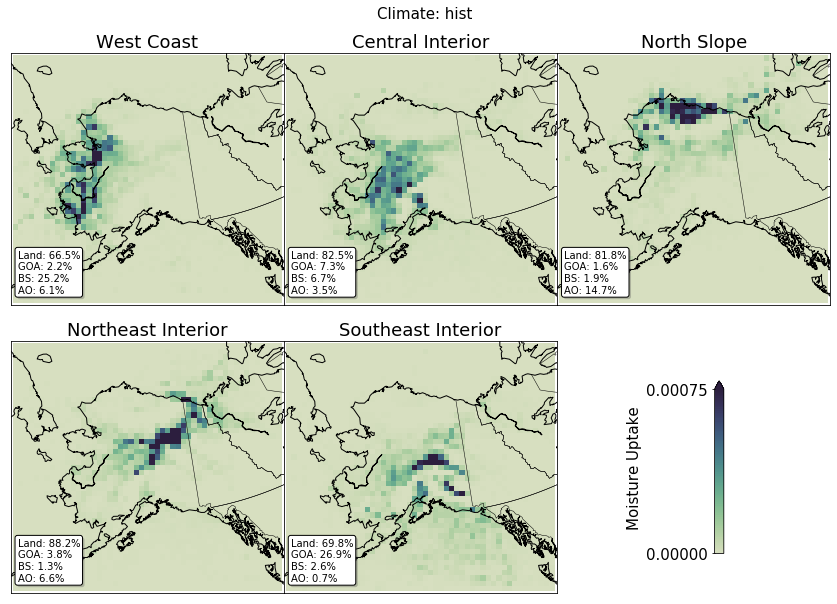

In [51]:
vmin_val=0
vmax_val=0.00075

fig = plt.figure(figsize=(11.5,8.))
fig.suptitle(f'Climate: {which_climate}', fontsize=15, y=1.05)

ax1 = fig.add_axes([0.0, 0.5, 0.33, 0.5]) 
ax1.set_title(regions_to_str(1), fontsize=18)

pc = m.pcolormesh(ds1.lons.values, ds1.lats.values, ds1mu, 
                  cmap=cmap, vmin=vmin_val, vmax=vmax_val)

ax1.text(0.025, 0.05, 
         u'Land: '+str(round(np.nansum(np.ma.masked_where(land.mask==False, ds1mu))/np.nansum(ds1mu)*100, 1))+\
         '%\nGOA: '+str(round(np.nansum(np.ma.masked_where(goa.mask==False, ds1mu))/np.nansum(ds1mu)*100, 1))+\
         '%\nBS: '+str(round(np.nansum(np.ma.masked_where(bs.mask==False, ds1mu))/np.nansum(ds1mu)*100, 1))+\
         '%\nAO: '+str(round(np.nansum(np.ma.masked_where(ao.mask==False, ds1mu))/np.nansum(ds1mu)*100, 1))+'%', 
         fontsize=10, alpha=1., color='k', zorder=6, transform=ax1.transAxes,
         bbox=dict(facecolor='w', edgecolor='k', alpha=1., linewidth=1., boxstyle='round', 
                   pad=0.25, path_effects=[path_effects.SimplePatchShadow(),path_effects.Normal()]))

m.drawstates()
m.drawcoastlines()
m.drawcountries()


ax2 = fig.add_axes([0.33, 0.5, 0.33, 0.5]) 
ax2.set_title(regions_to_str(3), fontsize=18)
pc = m.pcolormesh(ds1.lons.values, ds1.lats.values, ds2mu,
                  cmap=cmap, vmin=vmin_val, vmax=vmax_val)

ax2.text(0.025, 0.05, 
         u'Land: '+str(round(np.nansum(np.ma.masked_where(land.mask==False, ds2mu))/np.nansum(ds2mu)*100, 1))+\
         '%\nGOA: '+str(round(np.nansum(np.ma.masked_where(goa.mask==False, ds2mu))/np.nansum(ds2mu)*100, 1))+\
         '%\nBS: '+str(round(np.nansum(np.ma.masked_where(bs.mask==False, ds2mu))/np.nansum(ds2mu)*100, 1))+\
         '%\nAO: '+str(round(np.nansum(np.ma.masked_where(ao.mask==False, ds2mu))/np.nansum(ds2mu)*100, 1))+'%', 
         fontsize=10, alpha=1., color='k', zorder=6, transform=ax2.transAxes,
         bbox=dict(facecolor='w', edgecolor='k', alpha=1., linewidth=1., boxstyle='round', 
                   pad=0.25, path_effects=[path_effects.SimplePatchShadow(),path_effects.Normal()]))

m.drawstates()
m.drawcoastlines()
m.drawcountries()


ax3 = fig.add_axes([0.66, 0.5, 0.33, 0.5]) 
ax3.set_title(regions_to_str(4), fontsize=18)
pc = m.pcolormesh(ds1.lons.values, ds1.lats.values, ds3mu,
                  cmap=cmap, vmin=vmin_val, vmax=vmax_val)

ax3.text(0.025, 0.05, 
         u'Land: '+str(round(np.nansum(np.ma.masked_where(land.mask==False, ds3mu))/np.nansum(ds3mu)*100, 1))+\
         '%\nGOA: '+str(round(np.nansum(np.ma.masked_where(goa.mask==False, ds3mu))/np.nansum(ds3mu)*100, 1))+\
         '%\nBS: '+str(round(np.nansum(np.ma.masked_where(bs.mask==False, ds3mu))/np.nansum(ds3mu)*100, 1))+\
         '%\nAO: '+str(round(np.nansum(np.ma.masked_where(ao.mask==False, ds3mu))/np.nansum(ds3mu)*100, 1))+'%', 
         fontsize=10, alpha=1., color='k', zorder=6, transform=ax3.transAxes,
         bbox=dict(facecolor='w', edgecolor='k', alpha=1., linewidth=1., boxstyle='round', 
                   pad=0.25, path_effects=[path_effects.SimplePatchShadow(),path_effects.Normal()]))

m.drawstates()
m.drawcoastlines()
m.drawcountries()

ax4 = fig.add_axes([0.0, 0.0, 0.33, 0.5]) 
ax4.set_title(regions_to_str(5), fontsize=18)
pc = m.pcolormesh(ds1.lons.values, ds1.lats.values, ds4mu,
                  cmap=cmap, vmin=vmin_val, vmax=vmax_val)

ax4.text(0.025, 0.05, 
         u'Land: '+str(round(np.nansum(np.ma.masked_where(land.mask==False, ds4mu))/np.nansum(ds4mu)*100, 1))+\
         '%\nGOA: '+str(round(np.nansum(np.ma.masked_where(goa.mask==False, ds4mu))/np.nansum(ds4mu)*100, 1))+\
         '%\nBS: '+str(round(np.nansum(np.ma.masked_where(bs.mask==False, ds4mu))/np.nansum(ds4mu)*100, 1))+\
         '%\nAO: '+str(round(np.nansum(np.ma.masked_where(ao.mask==False, ds4mu))/np.nansum(ds4mu)*100, 1))+'%', 
         fontsize=10, alpha=1., color='k', zorder=6, transform=ax4.transAxes,
         bbox=dict(facecolor='w', edgecolor='k', alpha=1., linewidth=1., boxstyle='round', 
                   pad=0.25, path_effects=[path_effects.SimplePatchShadow(),path_effects.Normal()]))

m.drawstates()
m.drawcoastlines()
m.drawcountries()

ax5 = fig.add_axes([0.33, 0.0, 0.33, 0.5]) 
ax5.set_title(regions_to_str(6), fontsize=18)
pc = m.pcolormesh(ds1.lons.values, ds1.lats.values, ds5mu,
                  cmap=cmap, vmin=vmin_val, vmax=vmax_val)

ax5.text(0.025, 0.05, 
         u'Land: '+str(round(np.nansum(np.ma.masked_where(land.mask==False, ds5mu))/np.nansum(ds5mu)*100, 1))+\
         '%\nGOA: '+str(round(np.nansum(np.ma.masked_where(goa.mask==False, ds5mu))/np.nansum(ds5mu)*100, 1))+\
         '%\nBS: '+str(round(np.nansum(np.ma.masked_where(bs.mask==False, ds5mu))/np.nansum(ds5mu)*100, 1))+\
         '%\nAO: '+str(round(np.nansum(np.ma.masked_where(ao.mask==False, ds5mu))/np.nansum(ds5mu)*100, 1))+'%', 
         fontsize=10, alpha=1., color='k', zorder=6, transform=ax5.transAxes,
         bbox=dict(facecolor='w', edgecolor='k', alpha=1., linewidth=1., boxstyle='round', 
                   pad=0.25, path_effects=[path_effects.SimplePatchShadow(),path_effects.Normal()]))

m.drawstates()
m.drawcoastlines()
m.drawcountries()

cbar_ax = fig.add_axes([0.85, 0.1, 0.01125, 0.3])
bounds = [vmin_val, vmax_val]
newnorm=mpl.colors.Normalize(vmin=vmin_val, vmax=vmax_val)
cbar = mpl.colorbar.ColorbarBase(cbar_ax, cmap=cmap,
                                 norm=newnorm,
                                 ticks=bounds,
                                 orientation='vertical',
                                 extend='max')

cbar.set_label('Moisture Uptake', fontsize=15) 
cbar.ax.tick_params(labelsize=15)
cbar_ax.yaxis.set_ticks_position('left')
cbar_ax.yaxis.set_label_position('left')

plt.savefig(f"/glade/work/molina/DATA/temp_figs/alaska_mu_{which_climate}.png", bbox_inches='tight', dpi=200)

plt.show()
